In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# link for the dataset
# https://www.kaggle.com/camnugent/california-housing-prices

In [22]:
# loading/reading data set
data=pd.read_csv("C:/Users/Hp/Desktop/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# checking missing values in the dataset
data.info()
# total_bedrooms column has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# counting number of rows and columns in dataset

num=data.shape
print("Total rows and column in data set are %d and %d respectively" % (num[0],num[1]))

Total rows and column in data set are 20640 and 10 respectively


In [5]:
# calculating descriptive statistics of the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Text(0.5, 0, 'Histogram')

<Figure size 720x720 with 0 Axes>

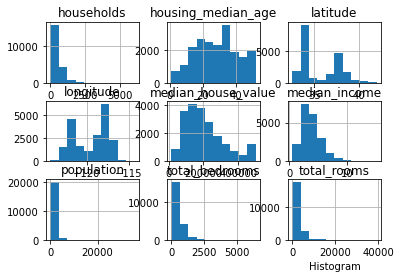

In [6]:
# graphs/visualization of the dataset
# histogram for checking distribution

plt.figure(figsize=(10,10))
x=data.iloc[:,0:10]
x.hist()
plt.xlabel("Histogram")

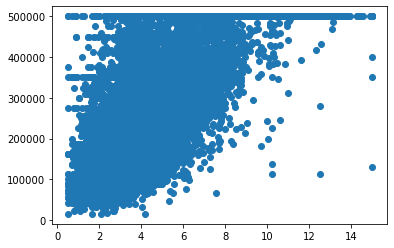

In [7]:
# scatter plot for linear relationship

y=data['median_house_value']
x1=data['median_income']
plt.scatter(x1,y)
plt.show()

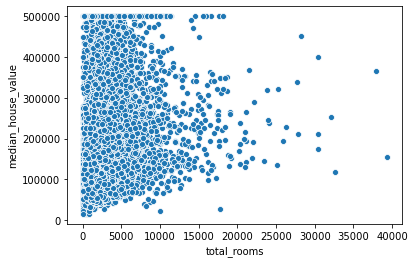

In [8]:
x2=data['total_rooms']
sns.scatterplot(x2,y)

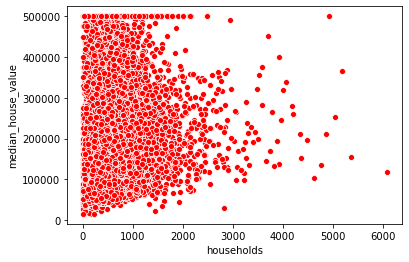

In [9]:
x3=data['households']
sns.scatterplot(x3,y,color="r")

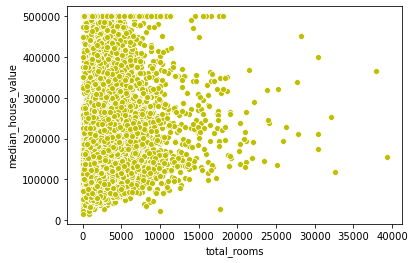

In [10]:
x4=data['total_rooms']
sns.scatterplot(x4,y,color='y')

#  All the scatterpolts show that there is a positive realtionship between the
# dependent and independent variables.

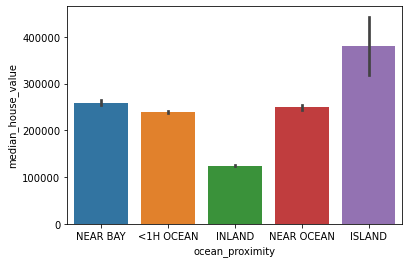

In [11]:
# bar plot

x5=data['ocean_proximity']
sns.barplot(x5,y)

#  Correlation Analysis

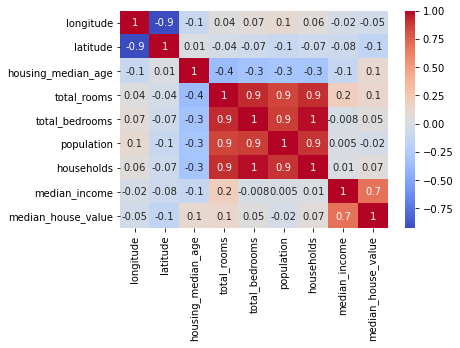

In [12]:
# correlation matrix

sns.heatmap(data.corr(),annot=True,fmt='.1g',cmap='coolwarm')

#  All the variables are correlated with each other.

# Regression model building

In [53]:
# handling missing values

var=data['total_bedrooms']
new_data=data.fillna(np.mean(var))

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
new_data.apply(le.fit_transform)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,170,515,40,733,128,296,125,12416,3665,3
1,171,513,20,5255,1104,2346,1129,12411,3074,3
2,169,512,51,1316,189,469,176,11941,3017,3
3,168,512,51,1123,234,531,218,10269,2917,3
4,168,512,51,1476,279,538,258,6656,2925,3
...,...,...,...,...,...,...,...,...,...,...
20635,284,675,24,1514,373,818,329,740,366,1
20636,272,676,17,556,149,330,113,3179,356,1
20637,271,670,16,2103,484,980,432,1037,508,1
20638,261,670,17,1709,408,714,348,1405,432,1


In [73]:
# loading dependent and independent variables

dep=data.iloc[:,8:9]
ind=new_data.iloc[:,0:8]
#i=ind.drop(['median_house_value'],axis=1,inplace=True) 

The value of R-Square is 0.6271991531192946


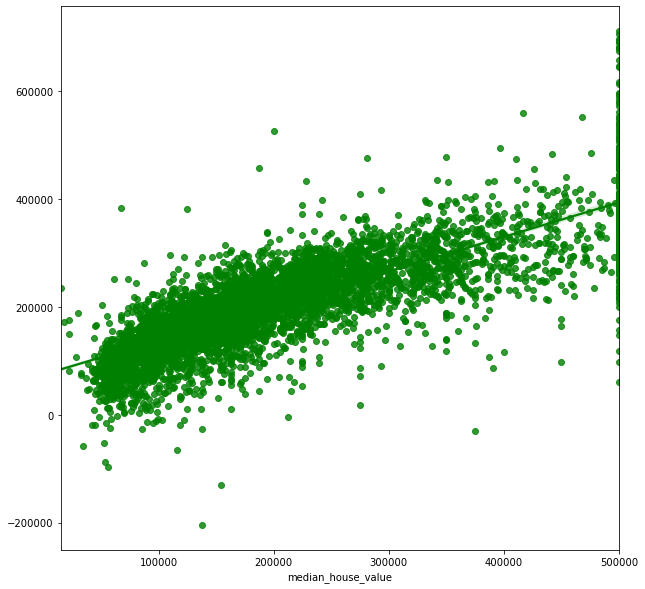

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind,dep,train_size=0.75,random_state=42)
#model fitting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
r2=r2_score(y_test,pred)
plt.figure(figsize=(10,10))
#plt.scatter(y_test,pred,color="red")
#plt.plot(y_test,pred,color="green")
#plt.show()
sns.regplot(y_test,pred,color="green")
print("The value of R-Square is",r2)

In [96]:
# simulation method to generate random number 

import random
longitude=np.random.normal(-119.5697,2.0035,10)
latitude=np.random.normal(35.6318,2.1359,10)
housing_median_age=np.random.normal(28.6395,12.5856,10)
total_rooms=np.random.normal(2636.7631,2181.6152,10)
total_bedrooms=np.random.normal(537.87,421.3850,10)
population=np.random.normal(1425.4767,1132.4621,10)
households=np.random.normal(499.5397,382.3297,10)
median_income=np.random.normal(3.8707,1.8998,10)

In [98]:
# constructing datafrma

data=list(zip(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income))
df=pd.DataFrame(data,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.628449,35.927827,19.972706,1368.460810,880.988475,-487.422744,953.383184,5.031470
1,-118.550798,34.696472,56.024068,3823.674385,-34.327622,770.362865,48.372281,5.479731
2,-123.036967,39.621695,30.184974,243.957030,421.805735,-70.589219,553.996235,1.209842
3,-120.691882,37.619011,39.199424,3383.632073,1373.475399,3010.508085,788.632249,2.164184
4,-115.384226,38.512281,24.885852,1093.937544,5.101402,2233.483118,972.406027,6.011166


In [103]:
# making predictions

pred=model.predict(df)

print("Predictions are given as follows")
print(pred)

Predictions are given as follows
[[419632.22454304]
 [227949.95685197]
 [144889.30889561]
 [159356.47476031]
 [-75309.54189118]
 [277704.9863771 ]
 [ 45217.66894818]
 [471001.43559831]
 [  8596.1432483 ]
 [-46280.6421268 ]]
